# Employee Attrition Prediction

## Problem Statement
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. 

## Data Description
The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

## Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [111]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [191]:
df.shape

(14999, 10)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [114]:
df.describe() #Describing Numerical values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [115]:
df[["Departments", "salary"]].describe() #Describing Object Type

,Departments,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


## Checking Null Values

In [116]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

## Unique elements in each attribute

In [117]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

## Exploratory Data Analysis

### Employees Left/Stay

In [118]:
df["left_df"]=df["left"].replace({0:"stay", 1:"churn"})
df["left_df"].value_counts()

stay     11428
churn     3571
Name: left_df, dtype: int64

In [119]:
left_names=df["left_df"].value_counts().index

In [120]:
left_val=df["left_df"].value_counts().values

([<matplotlib.patches.Wedge at 0x1a4795e9a30>,
 [Text(-0.8063869332849134, 0.7481578134507135, 'stay'),
  Text(0.8063869683087074, -0.7481577757010162, 'churn')],
 [Text(-0.43984741815540723, 0.4080860800640255, "''76.19%'"),
  Text(0.43984743725929487, -0.40808605947328147, "''23.81%'")])

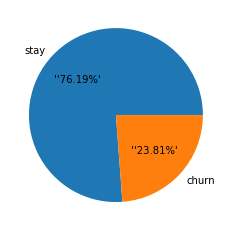

In [121]:
#Visualization of Left
plt.pie(left_val, labels=left_names, autopct="''%1.2f%%'")

Stayed Employees are more in number than Churned Employees

### Satisfaction Level

In [122]:
def satisfact(x):
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
df["satisfaction_class"] = df["satisfaction_level"].apply(satisfact)

In [123]:
df["satisfaction_class"].value_counts()

High         4268
Very High    4002
Normal       3605
Low          1646
Very Low     1478
Name: satisfaction_class, dtype: int64

In [124]:
df.groupby("satisfaction_class")["left_df"].value_counts()

satisfaction_class  left_df
High                stay       3846
                    churn       422
Low                 stay        835
                    churn       811
Normal              stay       2740
                    churn       865
Very High           stay       3453
                    churn       549
Very Low            churn       924
                    stay        554
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Satisfaction Level Vs Employee Left/Stay')

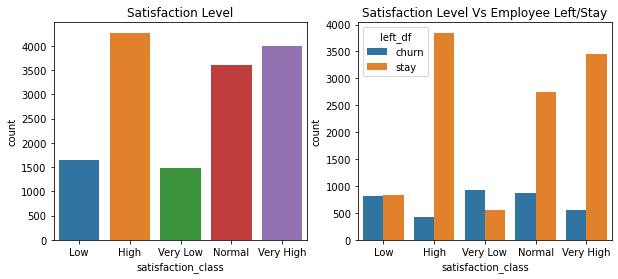

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["satisfaction_class"], ax=ax[0])
ax[0].set_title("Satisfaction Level")
sns.countplot('satisfaction_class', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Satisfaction Level Vs Employee Left/Stay")

People who have very low satisfaction level have most churn rate

### Last Evaluation

In [126]:
def evaluation(x):
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"    
df["last_evaluation_class"] = df["last_evaluation"].apply(evaluation)

In [127]:
df["last_evaluation_class"].value_counts()

Very High    5489
Normal       4727
High         4547
Low           236
Name: last_evaluation_class, dtype: int64

In [128]:
df.groupby("satisfaction_class")["left_df"].value_counts()

satisfaction_class  left_df
High                stay       3846
                    churn       422
Low                 stay        835
                    churn       811
Normal              stay       2740
                    churn       865
Very High           stay       3453
                    churn       549
Very Low            churn       924
                    stay        554
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Last Evaluation Class Vs Employee Left/Stay')

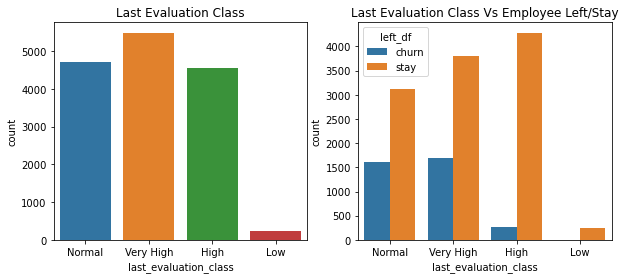

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["last_evaluation_class"], ax=ax[0])
ax[0].set_title("Last Evaluation Class")
sns.countplot('last_evaluation_class', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Last Evaluation Class Vs Employee Left/Stay")

Employee who have low evaluation point prefer to stay with the company and company lost employees from normal and very high class in their last evaluation

### Number of Project

In [130]:
df["number_project"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [131]:
df.groupby("number_project")["left_df"].value_counts()

number_project  left_df
2               churn      1567
                stay        821
3               stay       3983
                churn        72
4               stay       3956
                churn       409
5               stay       2149
                churn       612
6               churn       655
                stay        519
7               churn       256
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Projects Vs Employee Left/Stay')

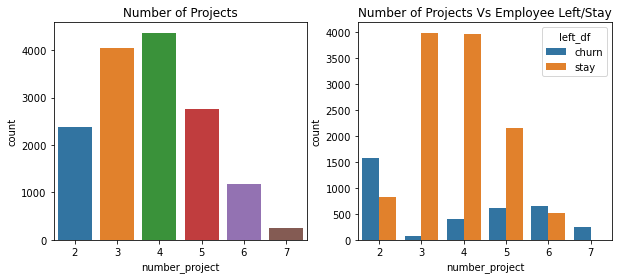

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["number_project"], ax=ax[0])
ax[0].set_title("Number of Projects")
sns.countplot('number_project', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Number of Projects Vs Employee Left/Stay")

People who have assigned to 7 projects mostly churned

### Average Monthly Hours

In [133]:
def monthly_hour(x):
    if x < 100:
        return "< 100"
    elif x < 200:
        return "< 200"
    elif x <= 300:
        return "< 300"
    elif x >= 300:
        return ">= 300"    
df["average_montly_hours_class"] = df["average_montly_hours"].apply(monthly_hour)

In [134]:
df["average_montly_hours_class"].value_counts()

< 200     7412
< 300     7374
>= 300     159
< 100       54
Name: average_montly_hours_class, dtype: int64

In [135]:
df.groupby("average_montly_hours_class")["left_df"].value_counts()

average_montly_hours_class  left_df
< 100                       stay         54
< 200                       stay       5756
                            churn      1656
< 300                       stay       5618
                            churn      1756
>= 300                      churn       159
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Monthly Hours Vs Employee Left/Stay')

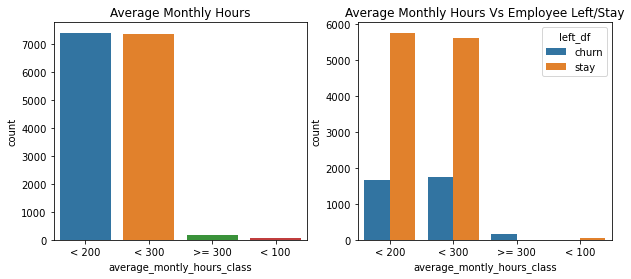

In [136]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["average_montly_hours_class"], ax=ax[0])
ax[0].set_title("Average Monthly Hours")
sns.countplot('average_montly_hours_class', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Average Monthly Hours Vs Employee Left/Stay")

People who work more average hours stays than other employees who quit job

### Time spend in a company

In [137]:
df["time_spend_company"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [138]:
df.groupby("time_spend_company")["left_df"].value_counts()

time_spend_company  left_df
2                   stay       3191
                    churn        53
3                   stay       4857
                    churn      1586
4                   stay       1667
                    churn       890
5                   churn       833
                    stay        640
6                   stay        509
                    churn       209
7                   stay        188
8                   stay        162
10                  stay        214
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Time Spent in a company Vs Employee Left/Stay')

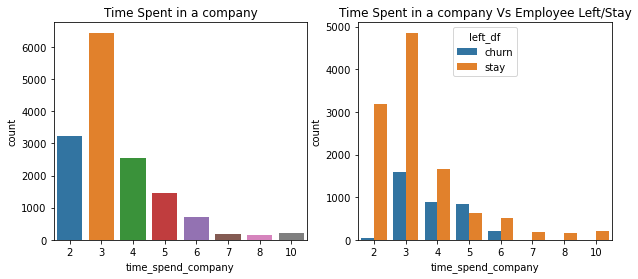

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["time_spend_company"], ax=ax[0])
ax[0].set_title("Time Spent in a company")
sns.countplot('time_spend_company', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Time Spent in a company Vs Employee Left/Stay")

Experienced employees mostly stay with company and 5 year is a threshold for most people to churn

### Work Accident

In [140]:
df["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [141]:
df.groupby("Work_accident")["left_df"].value_counts()

Work_accident  left_df
0              stay       9428
               churn      3402
1              stay       2000
               churn       169
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Accident Vs Employee Left/stay')

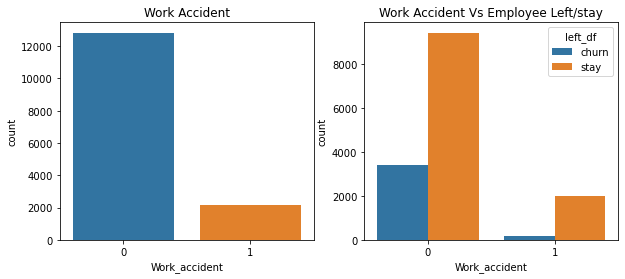

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["Work_accident"], ax=ax[0])
ax[0].set_title("Work Accident")
sns.countplot('Work_accident', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Work Accident Vs Employee Left/stay")

Most of the employees who had a work accident, preferred to stay in company

### Promotion in Last 5 Years

In [143]:
def promotion(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
df["promotion_class"] = df["promotion_last_5years"].apply(promotion)

In [144]:
df["promotion_class"].value_counts()

No     14680
Yes      319
Name: promotion_class, dtype: int64

In [145]:
df.groupby("promotion_class")["left_df"].value_counts()

promotion_class  left_df
No               stay       11128
                 churn       3552
Yes              stay         300
                 churn         19
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Promotion in Last 5 Years Vs Employee Left/Stay')

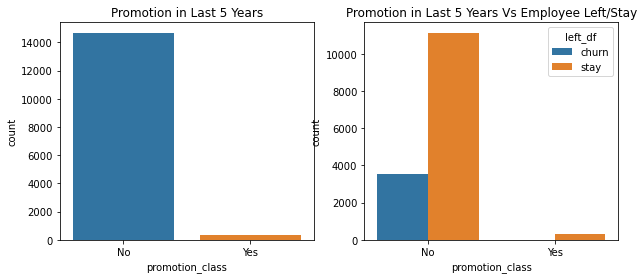

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["promotion_class"], ax=ax[0])
ax[0].set_title("Promotion in Last 5 Years")
sns.countplot('promotion_class', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Promotion in Last 5 Years Vs Employee Left/Stay")

Promoted Employees have lower churn rate

### Departments

In [147]:
df["Departments"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments, dtype: int64

In [148]:
df.groupby("Departments")["left_df"].value_counts()

Departments  left_df
IT           stay        954
             churn       273
RandD        stay        666
             churn       121
accounting   stay        563
             churn       204
hr           stay        524
             churn       215
management   stay        539
             churn        91
marketing    stay        655
             churn       203
product_mng  stay        704
             churn       198
sales        stay       3126
             churn      1014
support      stay       1674
             churn       555
technical    stay       2023
             churn       697
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Departments Vs Employee Left/Stay')

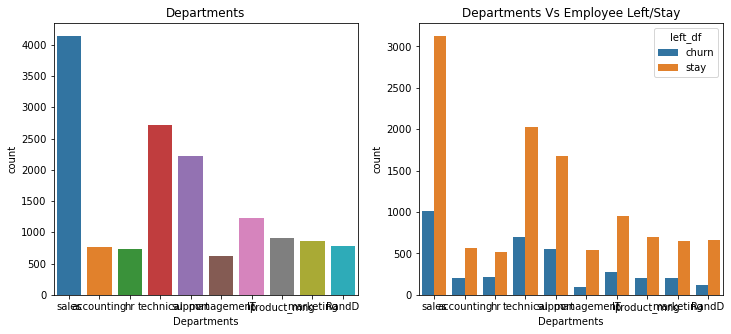

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(df["Departments"], ax=ax[0])
ax[0].set_title("Departments")
sns.countplot('Departments', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Departments Vs Employee Left/Stay")

HR Department has the most churn rate

### Salary

In [150]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [151]:
df.groupby("salary")["left_df"].value_counts()

salary  left_df
high    stay       1155
        churn        82
low     stay       5144
        churn      2172
medium  stay       5129
        churn      1317
Name: left_df, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salary Vs Employee Left/Stay')

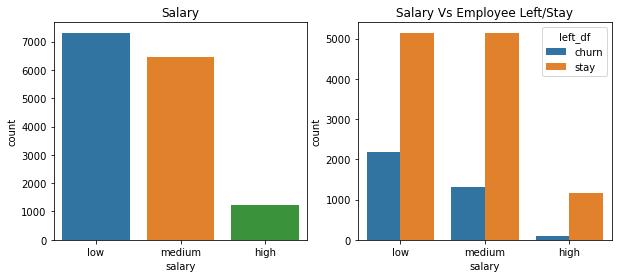

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(df["salary"], ax=ax[0])
ax[0].set_title("Salary")
sns.countplot('salary', hue='left_df', data=df, ax=ax[1])
ax[1].set_title("Salary Vs Employee Left/Stay")

Employees who works with low salary have higher churn rate

In [153]:
df.drop(["satisfaction_class", "last_evaluation_class", "average_montly_hours_class", "promotion_class","left_df"], axis=1, inplace=True)

## Pipelines

Using Pipelines for
1. Numerical Data: \
    a.Handling Missing Values\
    b.Scaling
2. Categorical Data:<br /> 
    a.Handling Missing Values<br /> 
    b.Encoding
3. Training the model

Stages of Pipeline:<br /> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Stage 1 - Preprocessing <br /> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Stage 2 - Model Training

### Splitting data into independent & dependent variables

In [154]:
X=df.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [155]:
X.shape

(14999, 9)

In [156]:
y=df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [157]:
y.shape

(14999,)

### Splitting Data as Train and Test Set

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preprocessing and Model Training using Pipelines

In [159]:
numeric_columns= X.select_dtypes(include=['int','float']).columns

In [160]:
#Numerical
numeric_processor=Pipeline(
    steps=[("imputation_mode", SimpleImputer(missing_values=np.NaN,strategy="most_frequent")), 
            ("standard_scaler", StandardScaler())]
)

In [161]:
category_columns=X.select_dtypes(include=['category', 'object']).columns

In [162]:
#Categorical
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant")), 
            ("onehot", OneHotEncoder(handle_unknown="ignore"))]
) 

In [163]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[("categorical", categorical_processor, category_columns),
    ("numerical", numeric_processor, numeric_columns)]
)

In [164]:
set_config(display="diagram")

In [165]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Departments', 'salary'], dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])

### Decision Tree Classifier

In [166]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = make_pipeline(preprocessor, DecisionTreeClassifier())
dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [167]:
dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [168]:
y_pred_dt = dt.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_dt)
cm

array([[3362,   66],
       [  43, 1029]], dtype=int64)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


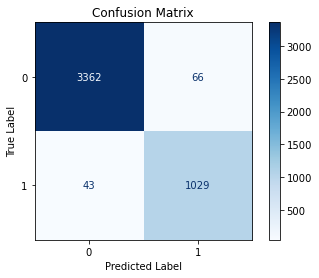

In [170]:
from sklearn.metrics import plot_confusion_matrix
color = 'black'
matrix = plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.show()

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.96      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



### KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn=make_pipeline(preprocessor, KNeighborsClassifier())
knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [173]:
knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [174]:
y_pred_knn = knn.predict(X_test)

In [175]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_knn)
cm

array([[3257,  171],
       [ 110,  962]], dtype=int64)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


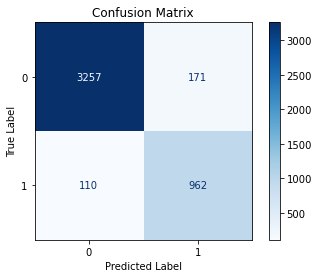

In [176]:
from sklearn.metrics import plot_confusion_matrix
color = 'black'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.show()

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3428
           1       0.85      0.90      0.87      1072

    accuracy                           0.94      4500
   macro avg       0.91      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



### Random Forest Classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfc = make_pipeline(preprocessor, RandomForestClassifier())
rfc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [179]:
model=rfc.fit(X_train, y_train)

In [180]:
y_pred_rfc = model.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_rfc)
cm

array([[3416,   12],
       [  51, 1021]], dtype=int64)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


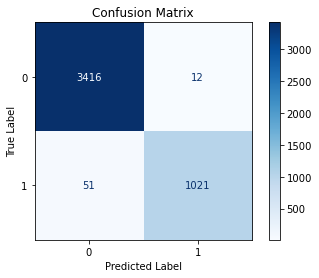

In [182]:
from sklearn.metrics import plot_confusion_matrix
color = 'black'
matrix = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.show()

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### Gradient Boosting Classifier

In [184]:
from sklearn.ensemble import GradientBoostingClassifier
grad = make_pipeline(preprocessor,GradientBoostingClassifier())
grad

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [185]:
grad.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Departments', 'salary'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [186]:
y_pred_grad = grad.predict(X_test)

In [187]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_grad)
cm

array([[3389,   39],
       [  85,  987]], dtype=int64)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


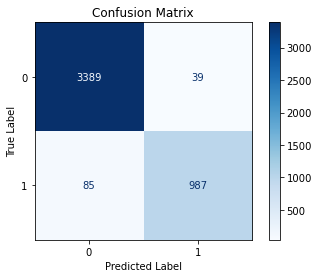

In [188]:
from sklearn.metrics import plot_confusion_matrix
color = 'black'
matrix = plot_confusion_matrix(grad, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.show()

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



The ML algorithm that perform the best was Random Forest Classifier with f1-score 0.99

In [190]:
import pickle
pickle.dump(model, open("rfc.pkl", "wb"))